## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
#set the plotting style
sns.set_style("whitegrid")

# Model preprocessing
from sklearn.preprocessing import StandardScaler

#Modelling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

# Plotting tools
import plotly.offline as po
import plotly.graph_objs as pg

#Scikit for imputer tools
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/jamilditter/election_results/refs/heads/main/data/Voting_Breakdown_By_Socioeconomic_and_Demographic_Factors.csv')


In [ ]:
df["pop_18_24_per"] = df["Population 18-24"] / df["voting_age_pop"]
df["pop_25_44_per"] = df["Population 25-44"] / df["voting_age_pop"]
df["pop_45_64_per"] = df["Population 45-64"] / df["voting_age_pop"]
df["pop_65_per"] = df["Population 65+"] / df["voting_age_pop"]

In [18]:
df["bach_per"] = df["bach_per"]/100
df["unemployment_rate"] = df["unemployment_rate"]/100

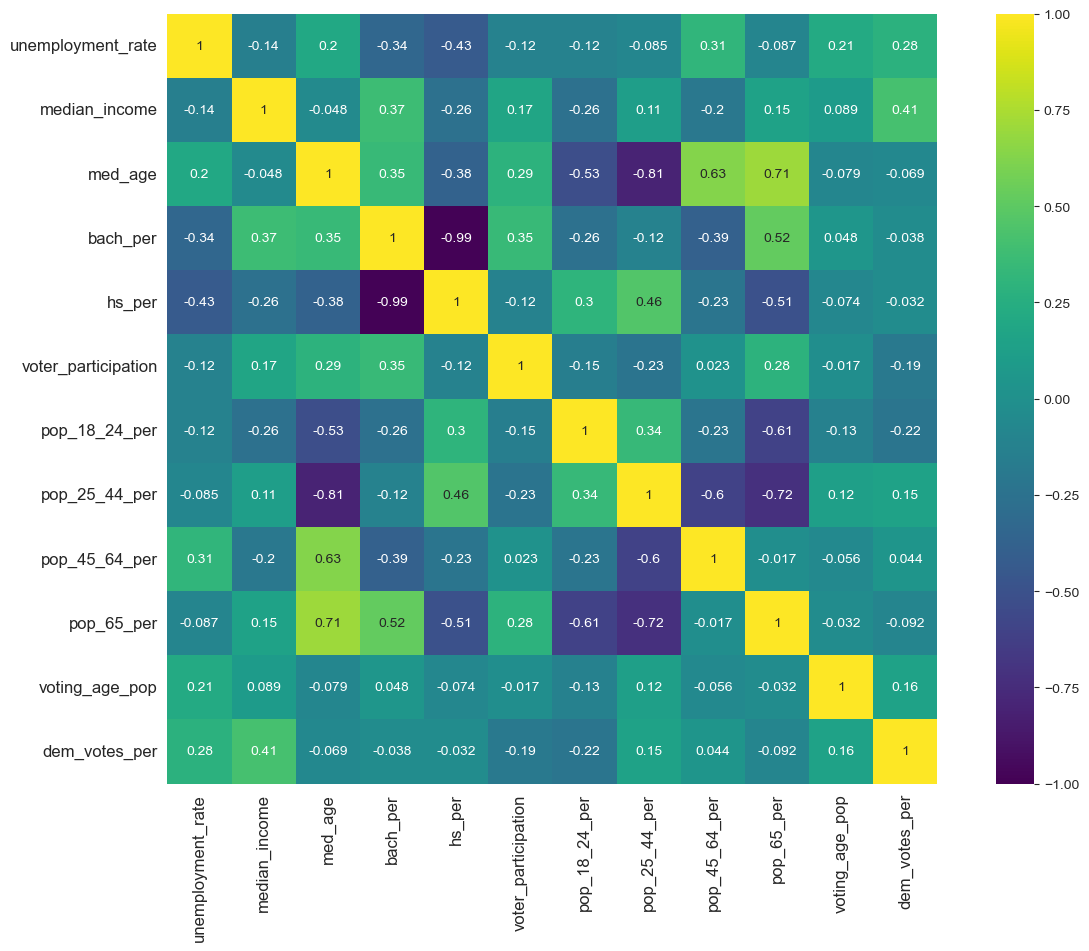

In [78]:
predictor_variables = ['unemployment_rate', 'median_income', 'med_age', 'bach_per', 'hs_per', 'voter_participation', 'pop_18_24_per', 'pop_25_44_per', 'pop_45_64_per', 'pop_65_per', 'voting_age_pop']

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix_dem = df[numerical_predictors+ ["dem_votes_per"]].corr()

plt.figure(figsize=(15,10))

sns.heatmap(corr_matrix_dem, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis")

plt.tick_params(labelsize=12)

plt.show()

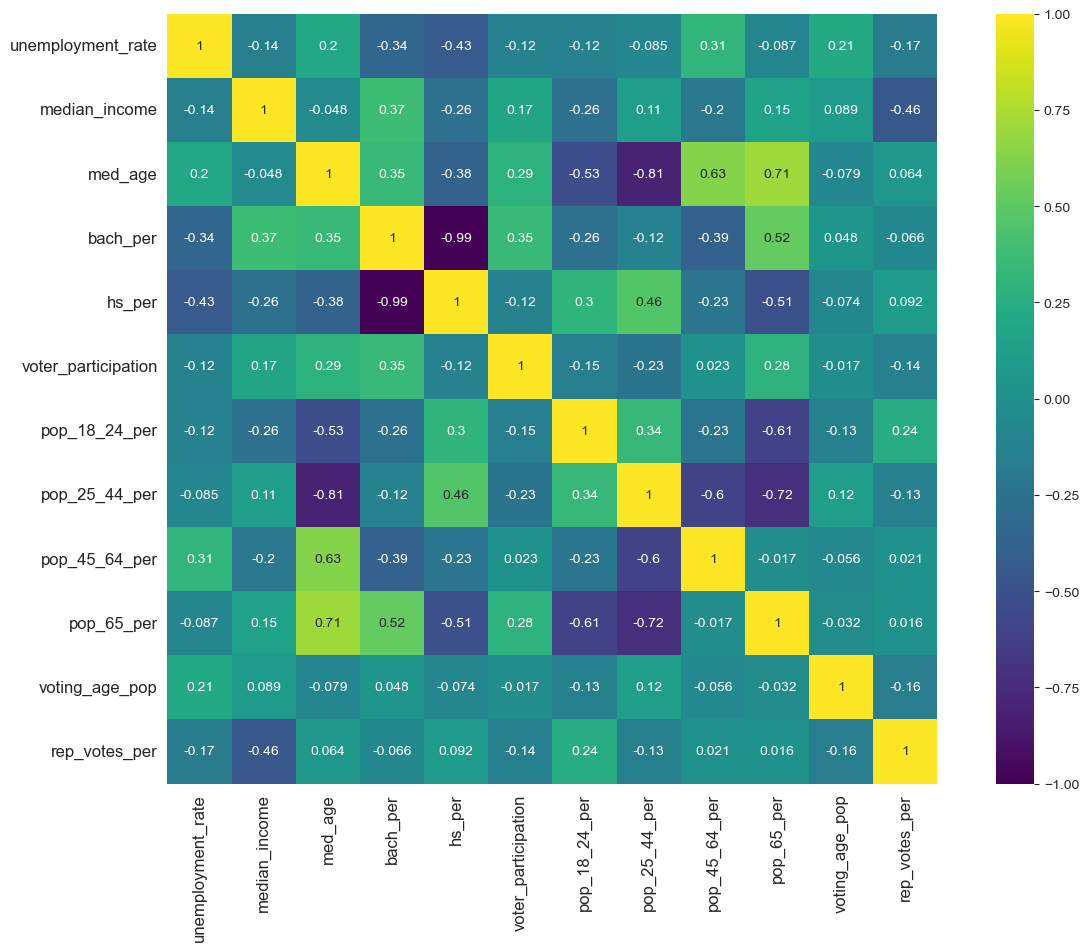

In [77]:
corr_matrix_rep = df[numerical_predictors+ ["rep_votes_per"]].corr()

plt.figure(figsize=(15,10))

sns.heatmap(corr_matrix_rep, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis")

plt.tick_params(labelsize=12)

plt.show()

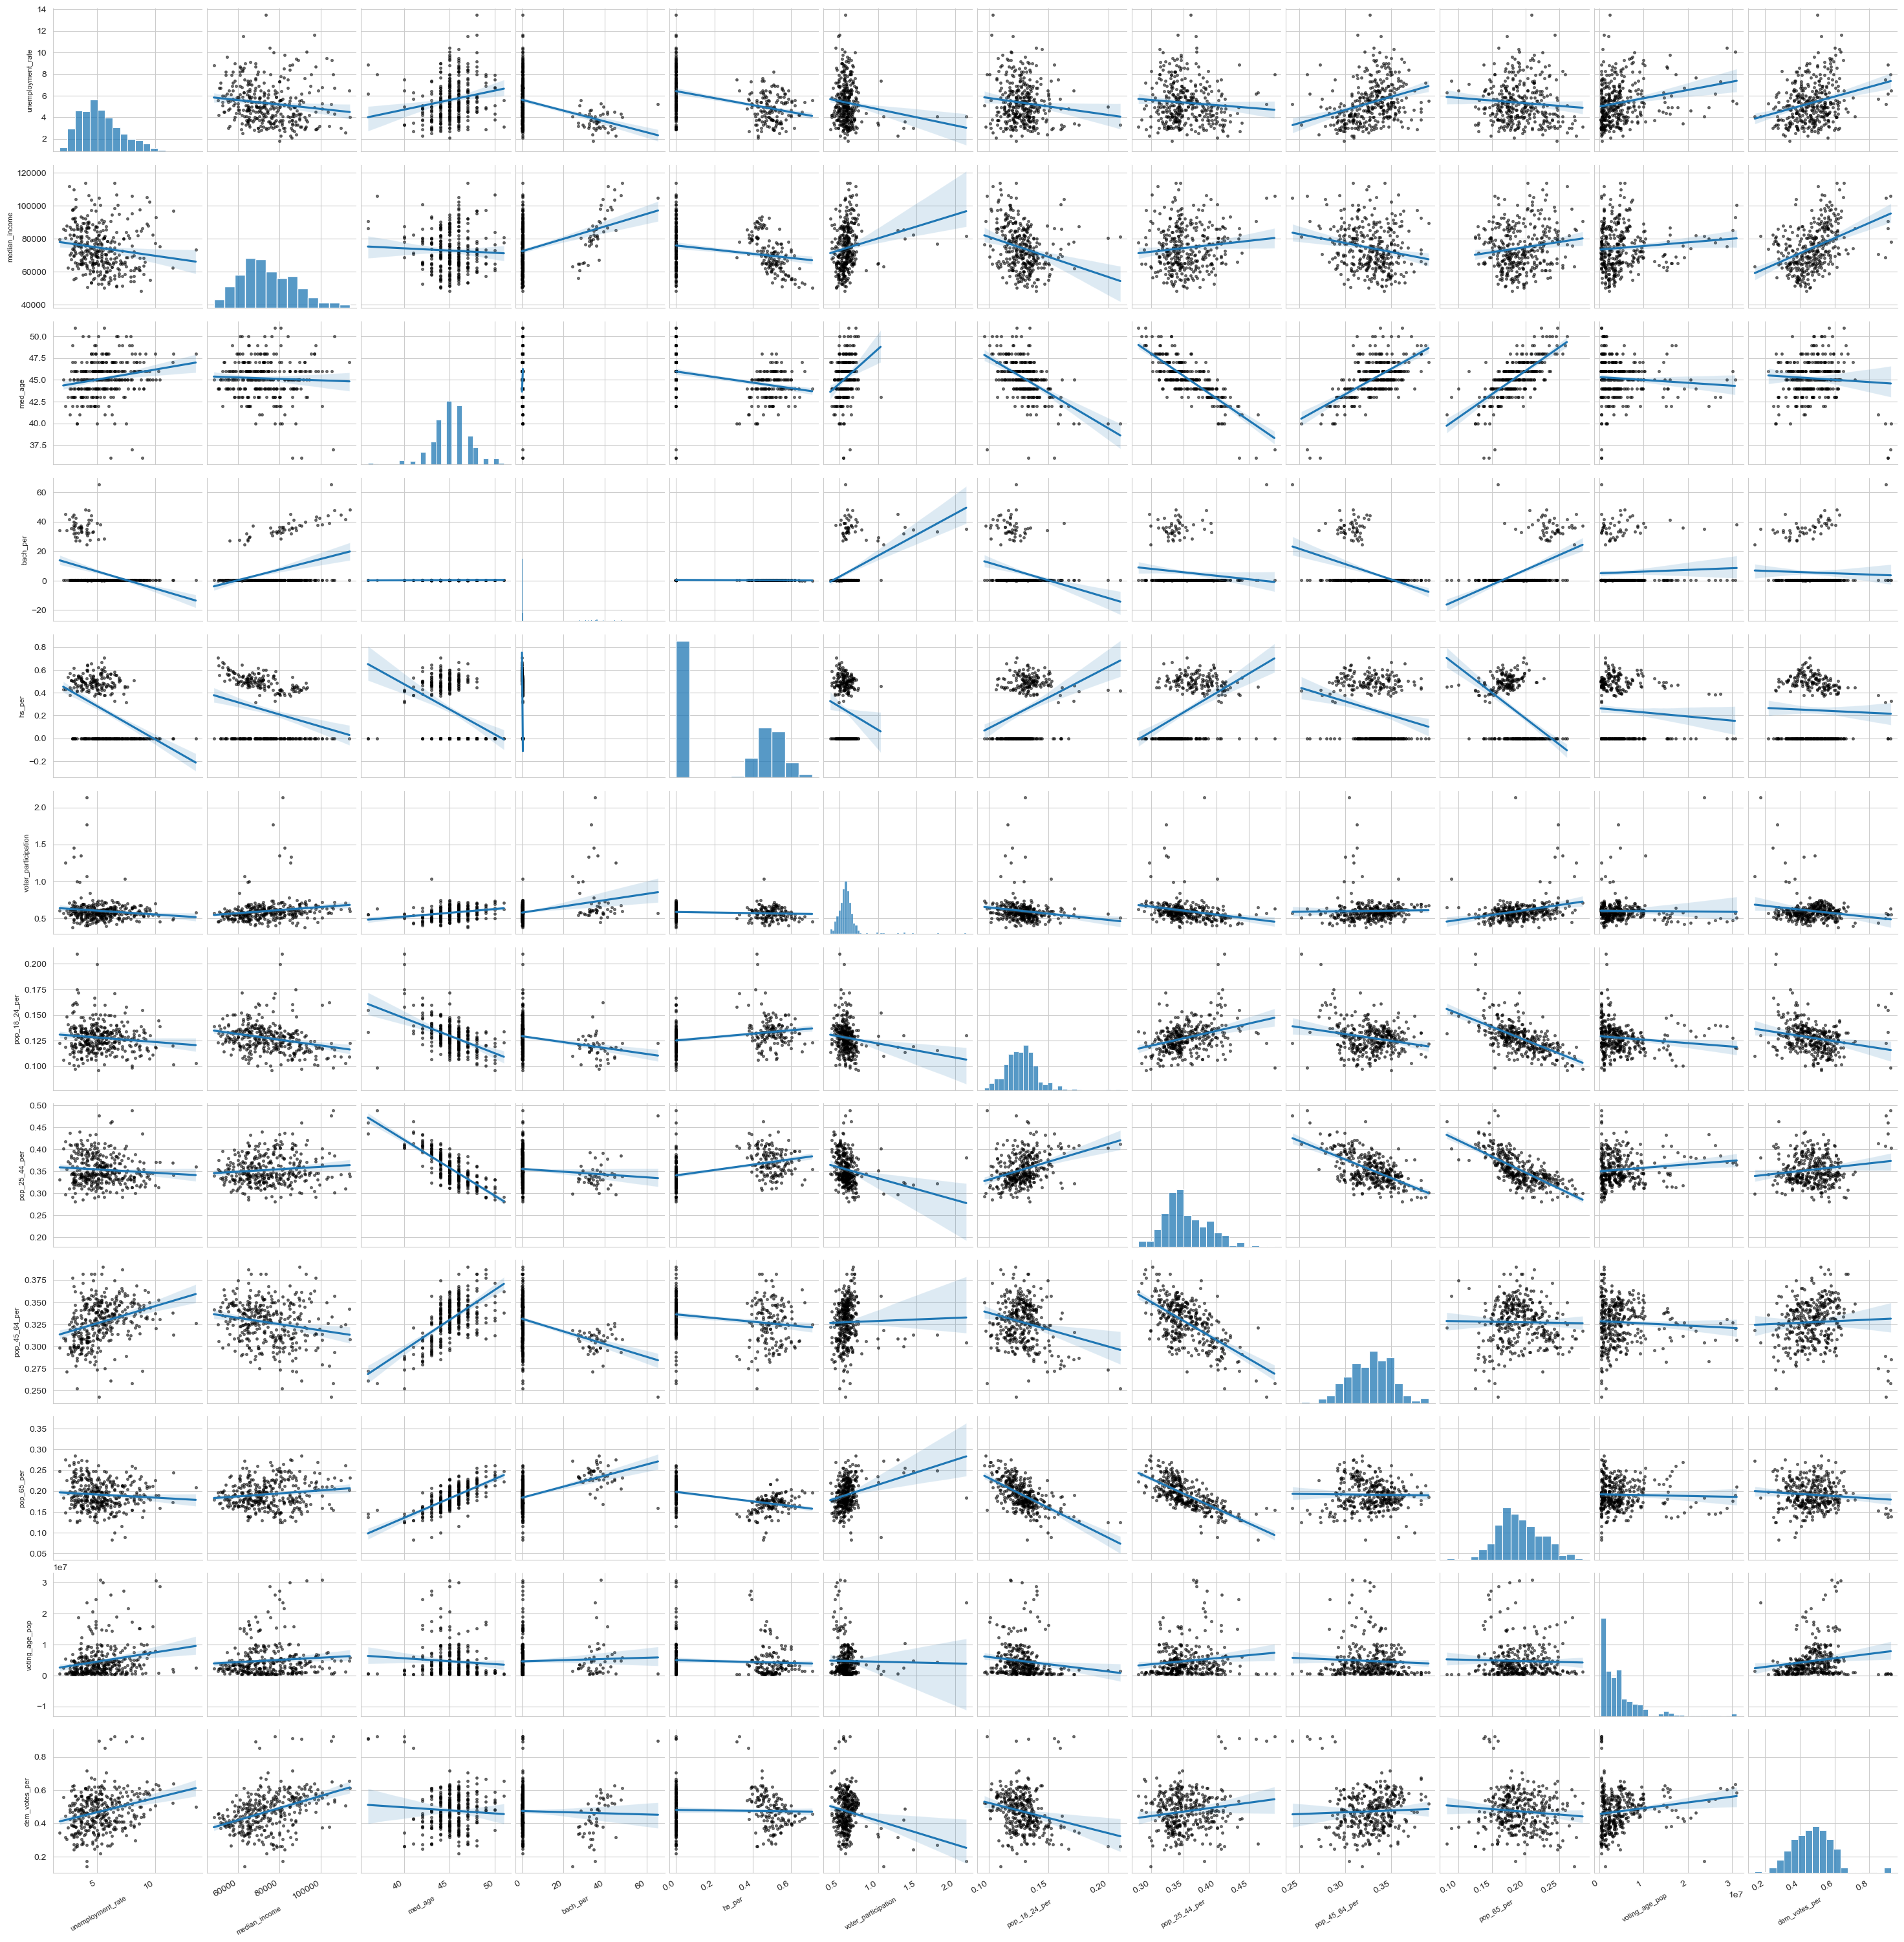

In [8]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['dem_votes_per'],
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

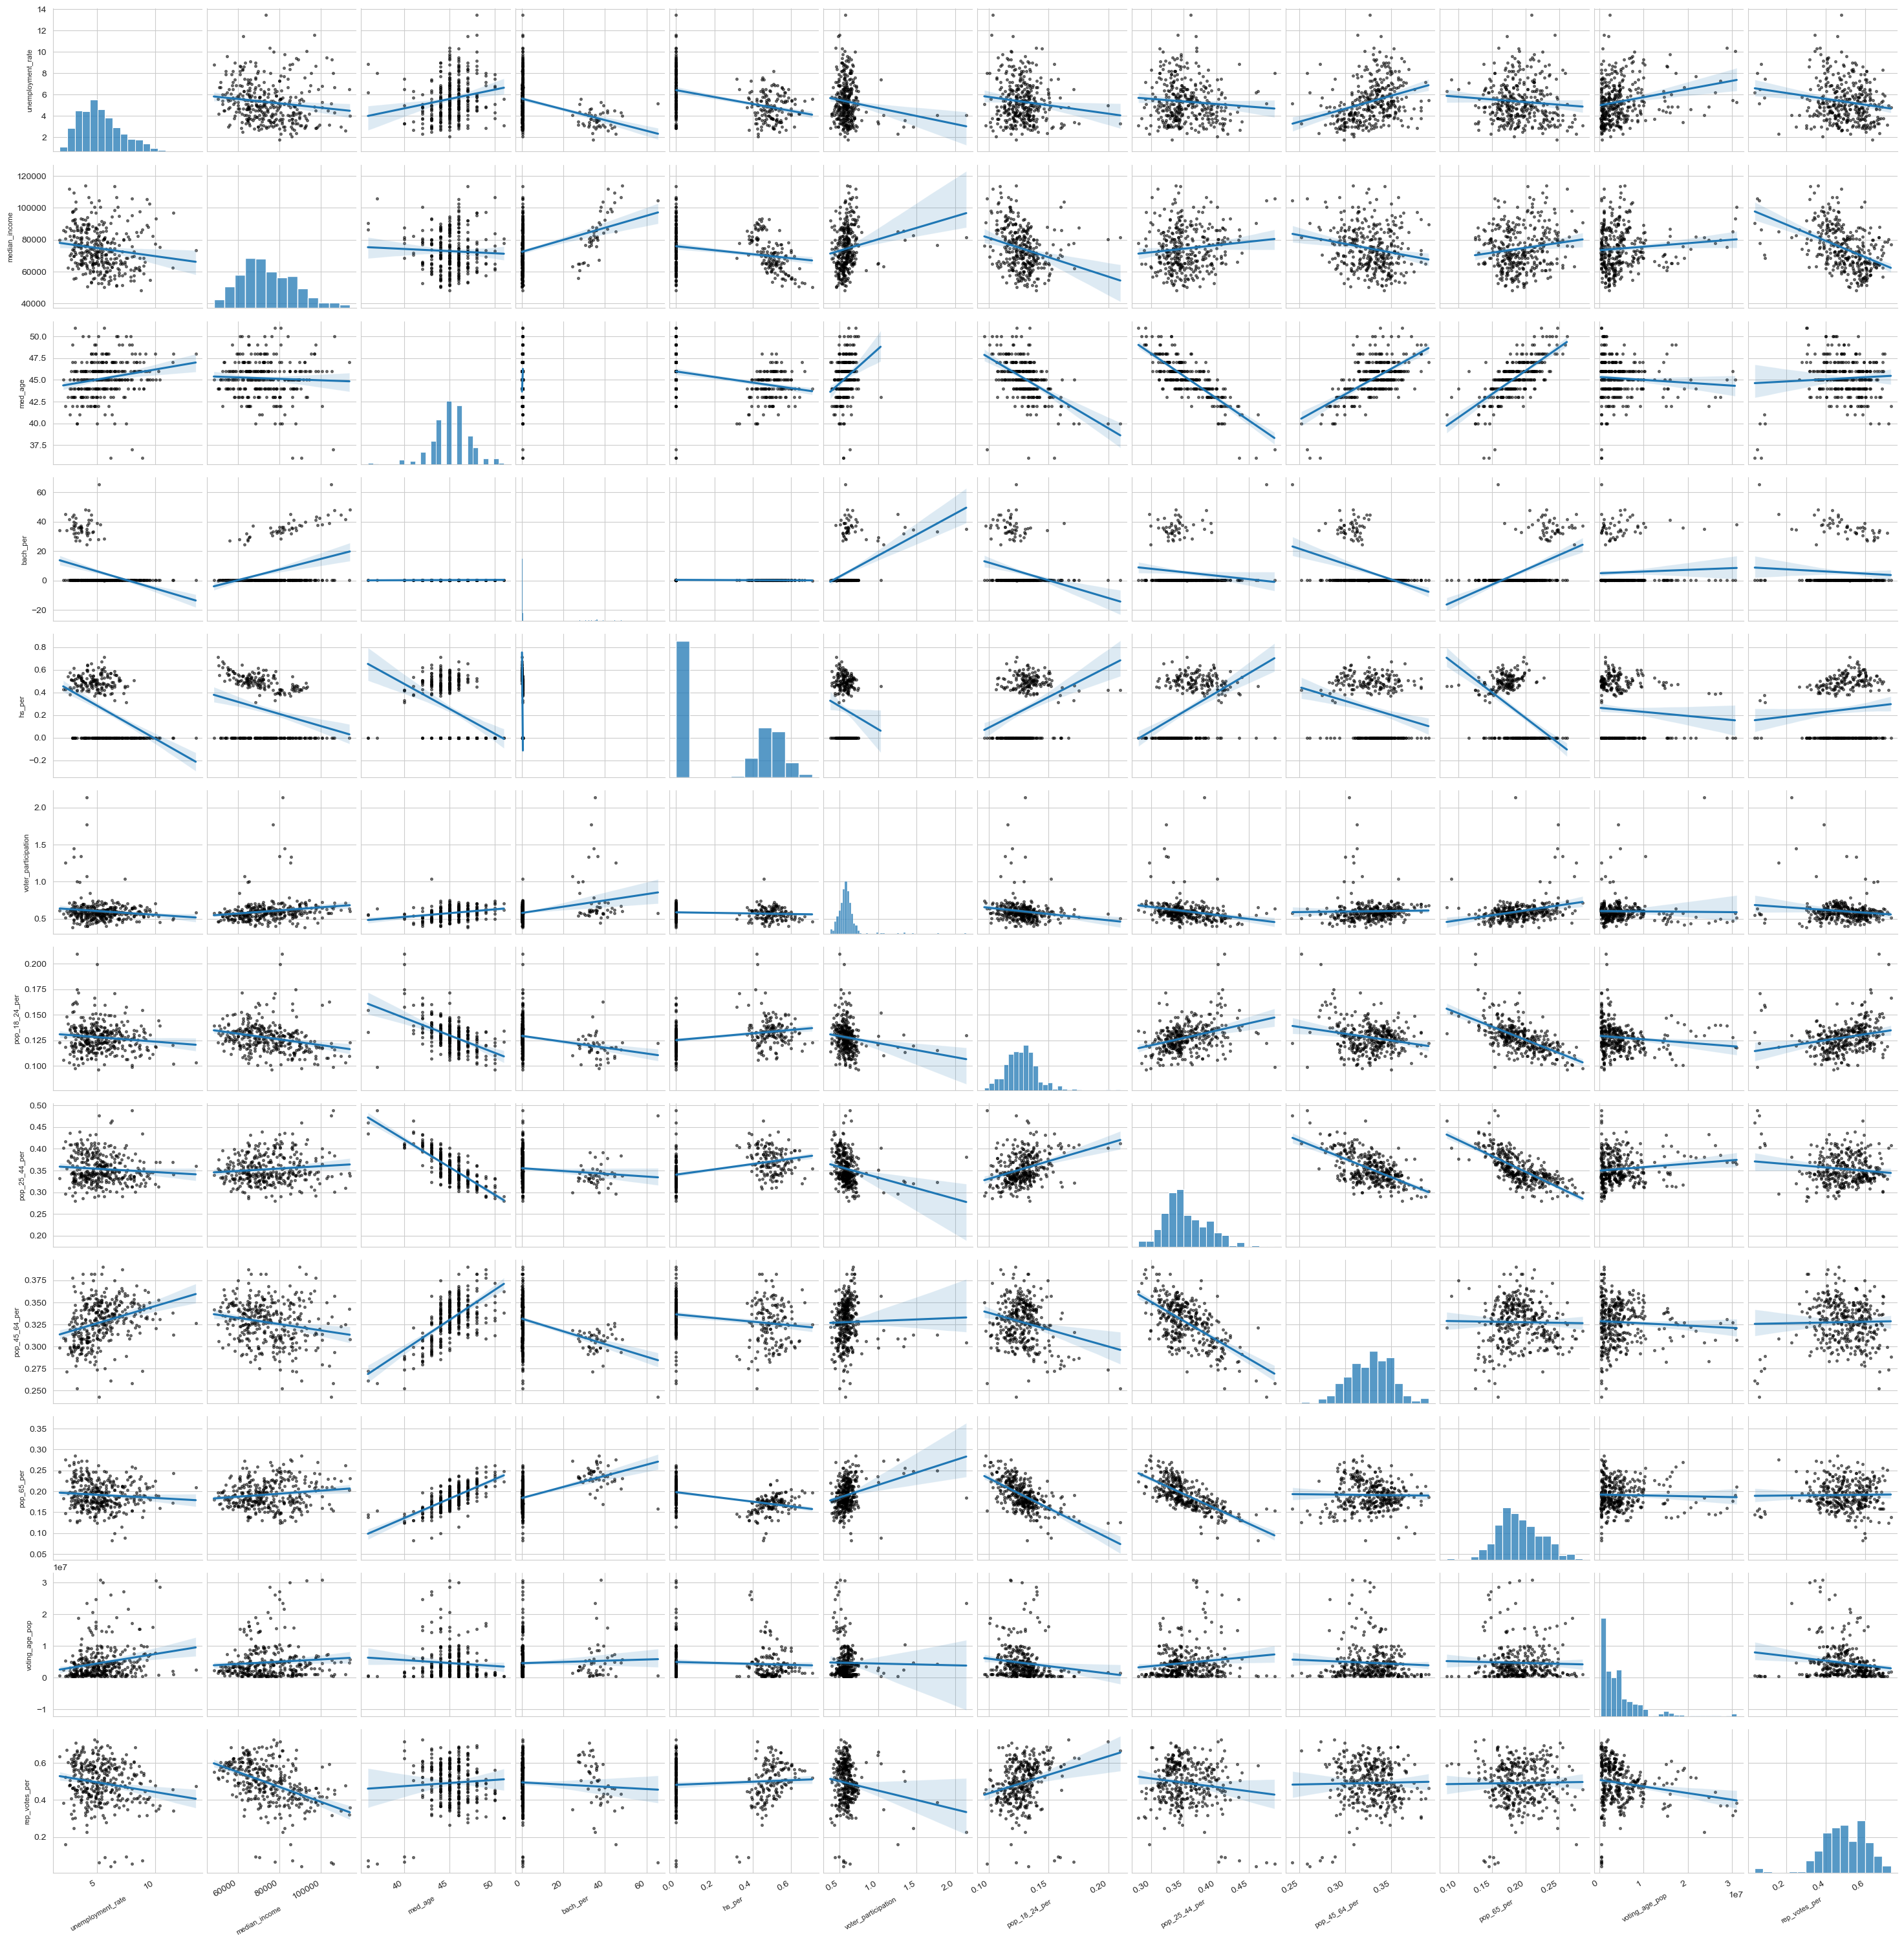

In [9]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['rep_votes_per'],
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

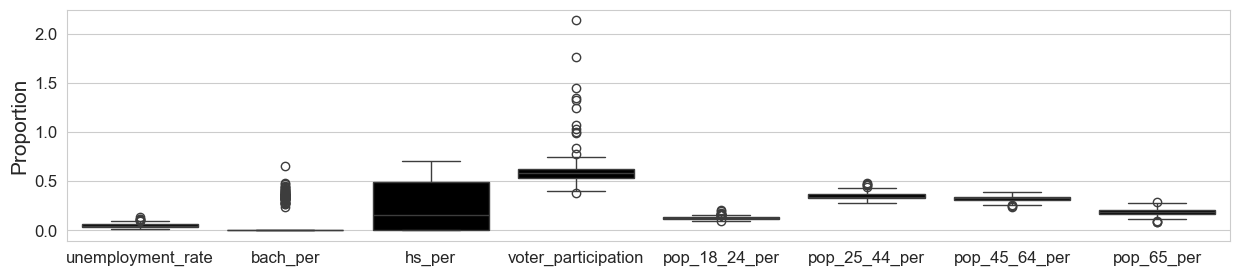

In [20]:
plt.figure(figsize=(15,3))

fractions = list(numerical_predictors)
fractions.remove('voting_age_pop')
fractions.remove('median_income')
fractions.remove('med_age')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)

plt.show()

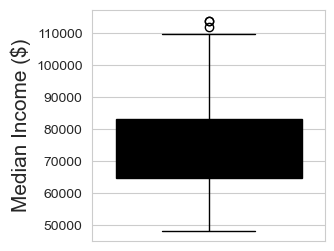

In [21]:
plt.figure(figsize=(3,3))

sns.boxplot(data=df, y = 'median_income', color='k')

plt.ylabel('Median Income ($)', fontsize=15)

plt.show()

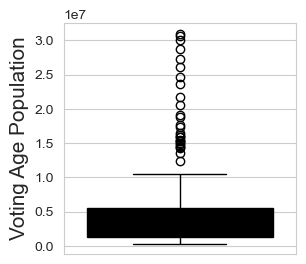

In [76]:
plt.figure(figsize=(3,3))

sns.boxplot(data=df, y = 'voting_age_pop', color='k')

plt.ylabel('Voting Age Population', fontsize=15)

plt.show()

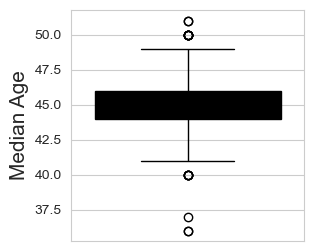

In [75]:
plt.figure(figsize=(3,3))

sns.boxplot(data=df, y = 'med_age', color='k')

plt.ylabel('Median Age', fontsize=15)

plt.show()

## Modelling

### Single input models

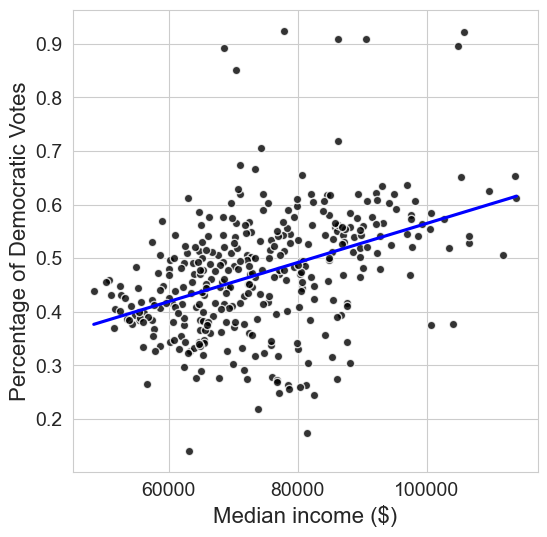

In [24]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x = 'median_income',
            y = 'dem_votes_per',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

#Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Percentage of Democratic Votes', fontsize=16)

#Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

In [37]:
df_med_income = df.dropna(subset=['median_income'])

In [38]:
model_median_income = smf.ols(formula='dem_votes_per ~ median_income', data=df_med_income).fit()

In [39]:
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:          dem_votes_per   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     69.01
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           2.34e-15
Time:                        18:38:25   Log-Likelihood:                 280.27
No. Observations:                 343   AIC:                            -556.5
Df Residuals:                     341   BIC:                            -548.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1996      0.033      6.004

In [40]:
y_hat = model_median_income.predict()

In [42]:
np.sqrt(mean_squared_error(df_med_income['dem_votes_per'], y_hat)).round(3)

np.float64(0.107)

In [43]:
mean_absolute_error(df_med_income['dem_votes_per'], y_hat)

0.07664660060737633

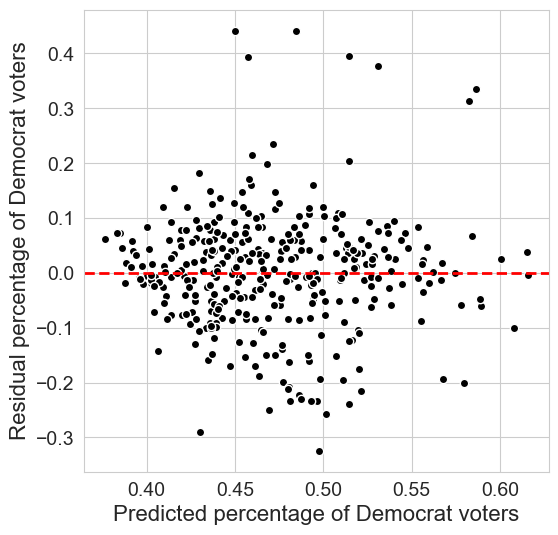

In [47]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Democrat voters', fontsize=16)
plt.ylabel('Residual percentage of Democrat voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

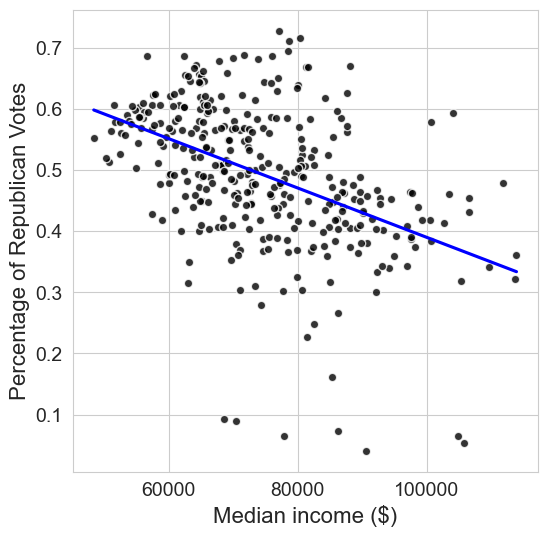

In [48]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x = 'median_income',
            y = 'rep_votes_per',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

#Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Percentage of Republican Votes', fontsize=16)

#Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

In [49]:
model_median_income = smf.ols(formula='rep_votes_per ~ median_income', data=df_med_income).fit()

In [50]:
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:          rep_votes_per   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     89.49
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           5.20e-19
Time:                        18:42:24   Log-Likelihood:                 290.36
No. Observations:                 343   AIC:                            -576.7
Df Residuals:                     341   BIC:                            -569.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7938      0.032     24.586

In [51]:
y_hat = model_median_income.predict()

In [53]:
np.sqrt(mean_squared_error(df_med_income['rep_votes_per'], y_hat)).round(3)

np.float64(0.104)

In [54]:
mean_absolute_error(df_med_income['rep_votes_per'], y_hat)

0.0751220363055787

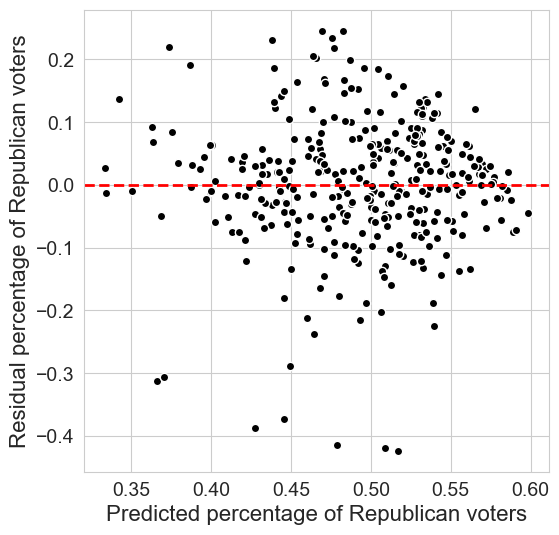

In [55]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Republican voters', fontsize=16)
plt.ylabel('Residual percentage of Republican voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

### Multiple Linear Regression Model

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                357 non-null    object 
 1   year                 357 non-null    int64  
 2   total_votes          357 non-null    int64  
 3   dem_votes            357 non-null    float64
 4   rep_votes            357 non-null    float64
 5   other_votes          348 non-null    float64
 6   green_votes          83 non-null     float64
 7   unemployment_rate    357 non-null    float64
 8   median_income        343 non-null    float64
 9   med_age              306 non-null    float64
 10  bach_per             357 non-null    float64
 11  hs_per               306 non-null    float64
 12  voting_age_pop       357 non-null    float64
 13  Population 18-24     357 non-null    int64  
 14  Population 25-44     357 non-null    int64  
 15  Population 45-64     357 non-null    int

In [60]:
model_dem = smf.ols(
    formula='dem_votes_per ~ unemployment_rate + median_income + med_age + bach_per + hs_per + voting_age_pop + pop_18_24_per + pop_25_44_per + pop_45_64_per + pop_65_per',
    data=df).fit()

In [61]:
print(model_dem.summary())

                            OLS Regression Results                            
Dep. Variable:          dem_votes_per   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     21.56
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.02e-29
Time:                        18:46:44   Log-Likelihood:                 305.42
No. Observations:                 294   AIC:                            -588.8
Df Residuals:                     283   BIC:                            -548.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           875.9452    266.52

In [62]:
y_hat = model_dem.predict()

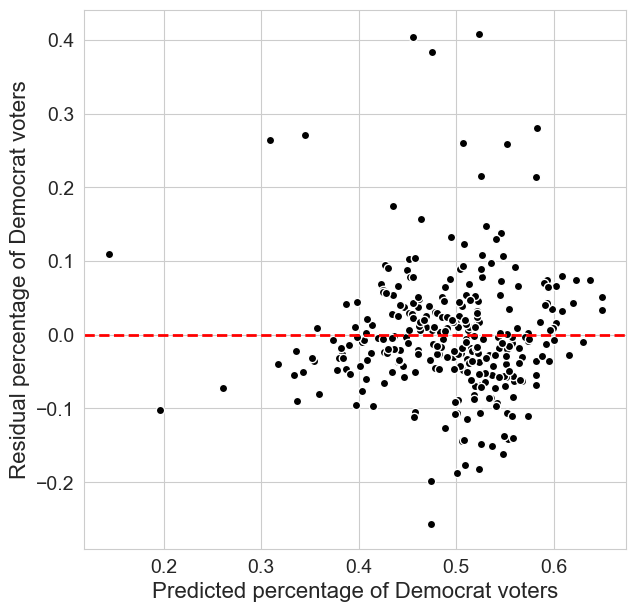

In [74]:
plt.figure(figsize=(7, 7))

plt.plot(y_hat, model_dem.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Democrat voters', fontsize=16)
plt.ylabel('Residual percentage of Democrat voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In [ ]:
mean_absolute_error(df['dem_votes_per'], model_dem.predict())

In [68]:
model_rep = smf.ols(
    formula='rep_votes_per ~ unemployment_rate + median_income + med_age + bach_per + hs_per + voting_age_pop + pop_18_24_per + pop_25_44_per + pop_45_64_per + pop_65_per',
    data=df).fit()

In [69]:
print(model_rep.summary())

                            OLS Regression Results                            
Dep. Variable:          rep_votes_per   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     18.93
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.63e-26
Time:                        18:49:47   Log-Likelihood:                 299.04
No. Observations:                 294   AIC:                            -576.1
Df Residuals:                     283   BIC:                            -535.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1016.1509    272.36

In [70]:
y_hat = model_rep.predict()

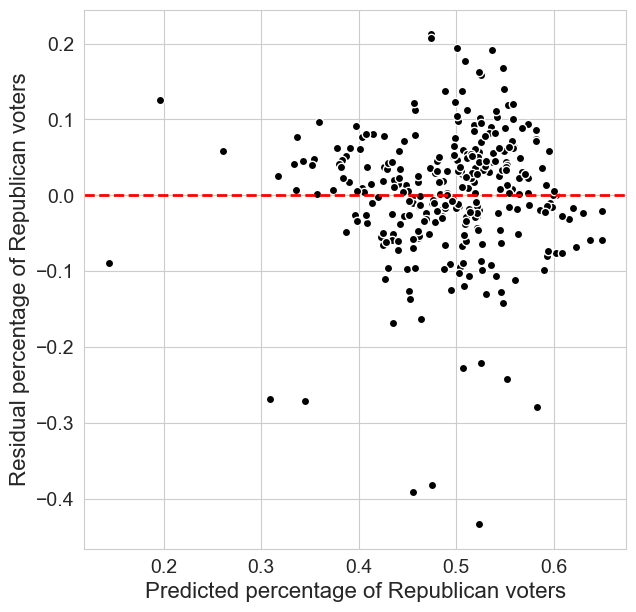

In [73]:
plt.figure(figsize=(7, 7))

plt.plot(y_hat, model_rep.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Republican voters', fontsize=16)
plt.ylabel('Residual percentage of Republican voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

### Reduced Model

In [ ]:
model_reduced = smf.ols(formula='average_act ~ rate_unemployment + percent_lunch',data=df).fit()

In [ ]:
print(model_reduced.summary())

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(y_hat, model_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In [ ]:
mean_absolute_error(df['average_act'], model_reduced.predict())

In [ ]:
mae_full = mean_absolute_error(df['average_act'], model.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_full = model.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_full, mae_reduced],
              'R-squared': [r2_full, r2_reduced]},
             index=['full model', 'reduced model']).round(4)

### Scaling

In [ ]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch']

In [ ]:
scaled_columns = [var + '_normalized' for var in predictor_variables]
print(scaled_columns)

In [ ]:
scaler = StandardScaler().fit(df[predictor_variables])

In [ ]:
df[scaled_columns] = scaler.transform(df[predictor_variables])

In [ ]:
df[scaled_columns].agg(['mean','std']).round(3)

In [ ]:
model_normalized = smf.ols(formula='average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized',data=df).fit()

In [ ]:
print(model_normalized.summary())

In [ ]:
mae_normalized = mean_absolute_error(df['average_act'], model_normalized.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_normalized = model_normalized.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_normalized, mae_reduced],
              'R-squared': [r2_normalized, r2_reduced]},
             index=['normalized model', 'reduced model']).round(4)